
# The eigenfaces example using PCA and SVM

The goal of this example is to demonstrate how Pricipal Component Analysis, an unsupervised method works.

Here we'll take a look at a simple facial recognition example. We are using subset of <b>`Labeled Faces in the Wild`</b> `<http://vis-www.cs.umass.edu/lfw/>`  data that is available with func:`sklearn.datasets.fetch_lfw_people`. 

## Import the dataset

In [1]:
%matplotlib inline

In [2]:
from sklearn import datasets

faces = datasets.fetch_olivetti_faces()
faces.data.shape

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\bits\scikit_learn_data


(400, 4096)

## Visualize the faces to see what we're working with

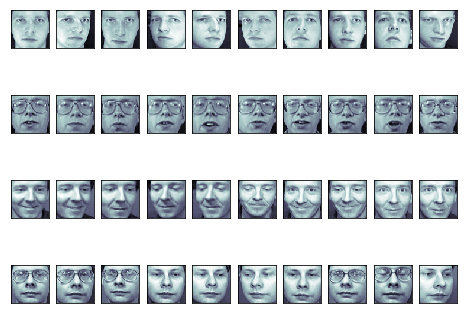

In [3]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(8, 6))
# plot several images
for i in range(40):
    ax = fig.add_subplot(4, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(faces.images[i], cmap=plt.cm.bone)

Note is that these faces have already been localized and scaled to a common size. This is an important preprocessing piece for facial  recognition, and is a process that can require a large collection of training data. 


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(faces.data,
        faces.target, random_state=0)

print(X_train.shape, X_test.shape)

(300, 4096) (100, 4096)


## Preprocessing: Principal Component Analysis


1850 dimensions is a lot for SVM. We can use PCA to reduce these 1850
features to a manageable size, while maintaining most of the information
in the dataset.



In [25]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=150, whiten=True)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=150, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

One interesting part of PCA is that it computes the "mean" face.



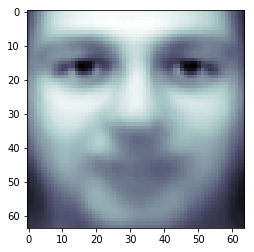

In [26]:
plt.imshow(pca.mean_.reshape(faces.images[0].shape),
           cmap=plt.cm.bone)

The principal components measure deviations about this mean along
orthogonal axes.



In [7]:
print(pca.components_.shape)

(150, 4096)


Visualize these principal components:



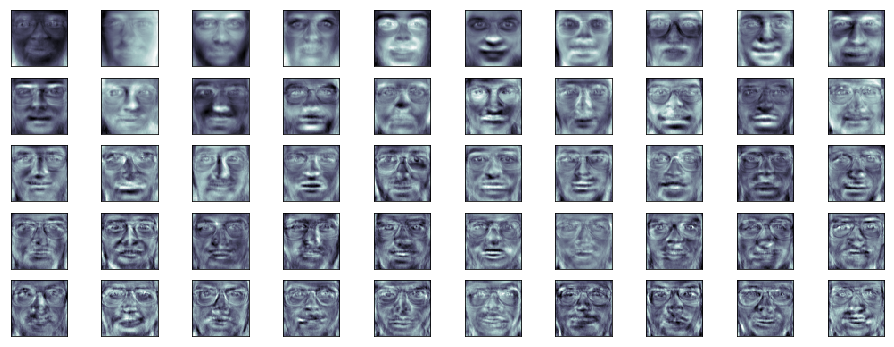

In [8]:
fig = plt.figure(figsize=(16, 6))
for i in range(50):
    ax = fig.add_subplot(5, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(pca.components_[i].reshape(faces.images[0].shape),
              cmap=plt.cm.bone)

The components ("eigenfaces") are ordered by their importance from
top-left to bottom-right. We see that the first few components seem to
primarily take care of lighting conditions; the remaining components
pull out certain identifying features: the nose, eyes, eyebrows, etc.


## Apply PCA to X 

In [20]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape)
print(X_test_pca.shape)

(300, 150)
(100, 150)


## Train a machine learning model

We will using Support vector machines for the classification.

In [21]:
from sklearn import svm
# create SVM mdoel
clf = svm.SVC(C=5., gamma=0.001)
# train SVM
clf.fit(X_train_pca, y_train)

SVC(C=5.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [22]:
# predict using SVM
y_pred = clf.predict(X_test_pca)
print(y_pred)

[13 30 34 19 24  6 15 26 14 21  3 13 11 34  1  5 29 14 20 19 17 15 12 34
 17 31  2  1 28 10 17 30 33 22  6  7  9 17 17 39 10 32 28  0 29  5 37  2
 15 23 24 14 29 17 28 31  5  1  2  4  7 27  4 35 19 37 14  0 15 31  0 26
  6  2 10  1 36 30 36 32 33  6  5 10 30 22 12 37 39 32 38 25  5  4 19 14
 13 39 26 36]


In [23]:
# original or actual y 
y_test

array([13, 30, 34, 19, 24,  6, 15, 26, 14, 21,  3, 13, 11, 34,  1,  5, 29,
       14, 20, 19, 17, 26, 12, 34, 17, 31,  7,  1, 28, 10, 17, 30, 33, 22,
        6,  7,  9, 17, 17, 39, 10, 32,  0,  0, 29,  5, 37, 25, 15, 23, 24,
       14, 29, 17, 28, 31,  5,  1,  2,  4,  7, 27,  0, 35, 19, 37, 14,  0,
       15, 31,  0, 26,  6,  2, 10,  1, 36, 30, 36, 32, 33,  6,  5, 10, 30,
       22, 12, 37, 39, 32, 38, 25,  5,  0, 19, 14, 13, 39, 26, 36])

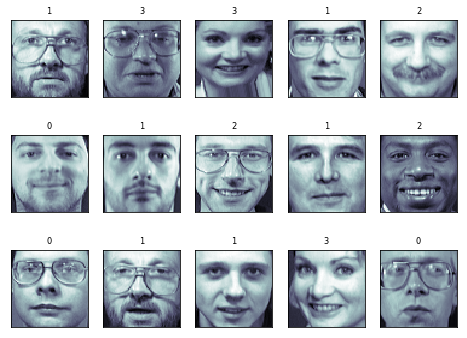

In [17]:
import numpy as np
fig = plt.figure(figsize=(8, 6))
for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test[i].reshape(faces.images[0].shape),
              cmap=plt.cm.bone)
    y_pred = clf.predict(X_test_pca[i, np.newaxis])[0]
    color = ('black' if y_pred == y_test[i] else 'red')
    ax.set_title(faces.target[y_pred],
                 fontsize='small', color=color)

The classifier is correct on an impressive number of images given the
simplicity of its learning model! Using a linear classifier on 150
features derived from the pixel-level data, the algorithm correctly
identifies a large number of the people in the images.


In [24]:
# compute the accuracy
from sklearn import metrics
y_pred = clf.predict(X_test_pca)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       1.00      1.00      1.00         4
           2       0.50      1.00      0.67         2
           3       1.00      1.00      1.00         1
           4       0.33      1.00      0.50         1
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         4
           7       1.00      0.67      0.80         3
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         4
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         5
          15       0.75      1.00      0.86         3
          17       1.00      1.00      1.00         6
          19       1.00      1.00      1.00         4
          20       1.00    